In [1]:
import sys
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath('..'))

from model import preprocess_data
from model.train import HST

2024-09-24 12:17:40.626679: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-24 12:17:41.686317: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
Using TensorFlow backend


# Load model and dataset to test

In [2]:
synthetic_dataset =  "/home/annalena/PedestrianTrajectoryPrediction/datasets/test_dataset_synth"
jrdb_original = "/home/annalena/PedestrianTrajectoryPrediction/datasets/test_dataset_orig"
jrdb_odometry_processed = "/home/annalena/PedestrianTrajectoryPrediction/datasets/test_dataset_odom"
synth_norm = "/home/annalena/PedestrianTrajectoryPrediction/datasets/test_dataset_synth_norm"
eth_augmented = "/home/annalena/PedestrianTrajectoryPrediction/datasets/test_dataset_eth_aug"
crowdbot_odom = "/home/annalena/PedestrianTrajectoryPrediction/datasets/crowdbot_test_data"
crowdbot_orig = "/home/annalena/PedestrianTrajectoryPrediction/datasets/crowdbot_test"

test_dataset =  tf.data.Dataset.load(synthetic_dataset)
test_dataset = tf.data.Dataset.unbatch(test_dataset)
test_dataset = test_dataset.batch(1000)

2024-09-24 12:17:52.924666: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-09-24 12:17:52.957305: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-09-24 12:17:52.958128: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-09-24 12:17:52.961398: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-09-24 12:17:52.961972: I tensorflow/compile

In [3]:
synthetic_dataset_model =  "/home/annalena/PedestrianTrajectoryPrediction/trained_models/synth_5/ckpts_best/ckpt" #5/10
synthetic_dataset_model2 =  "/home/annalena/PedestrianTrajectoryPrediction/trained_models/synth_8/ckpts_best/ckpt" # 8/7
# jrdb_original =  TODO
jrdb_odom = "/home/annalena/PedestrianTrajectoryPrediction/trained_models/odom_aug/ckpts_best/ckpt" # 5/10
jrdb_odom_2 = "/home/annalena/PedestrianTrajectoryPrediction/trained_models/odom_aug_8/ckpts_best/ckpt" # 8/7
jrdb_pose = "/home/annalena/PedestrianTrajectoryPrediction/trained_models/odom_aug_pose/ckpts_best/ckpt"
eth_augmented = "/home/annalena/PedestrianTrajectoryPrediction/trained_models/eth_aug/ckpts_best/ckpt"
eth_finetuned = "/home/annalena/PedestrianTrajectoryPrediction/trained_models/eth_tune_synth/ckpts_best/ckpt"


model = HST(15)
optimizer = tf.keras.optimizers.Adam()
checkpoint = tf.train.Checkpoint(model=model, optimizer=optimizer)
latest_checkpoint = tf.train.latest_checkpoint(synthetic_dataset_model) # put trained model here
checkpoint.restore(latest_checkpoint)

# Predict and show examples

In [4]:
%matplotlib inline

In [5]:
def plot_example(input, pred, idx, mode):

    ground_truth = input[0][idx][:,:2].numpy()
    prediction = pred["position"][idx,:,mode,:2].numpy()

    plt.plot(ground_truth[:6,0], ground_truth[:6,1], 'ro-', label='Ground Truth Input')
    plt.plot(ground_truth[6:,0], ground_truth[6:,1], 'rx-', label='Ground Truth Forecast')
    plt.plot(prediction[6:,0], prediction[6:,1],'bo-', label='Model Forecast')
    plt.show()
def plot_all(input_batch, pred, idx, mode):
    ground_truth = input_batch[0][idx][:,:2].numpy()
    prediction = pred["position"][idx,:,mode,:2].numpy()


    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

    ax1.plot(ground_truth[1:,0], ground_truth[1:,1], 'ro-')
    ax1.plot(prediction[6:,0], prediction[6:,1],'bo-')
    ax2.plot(ground_truth[6:,0], ground_truth[6:,1], 'ro-')
    ax3.plot(prediction[6:,0], prediction[6:,1],'bo-')
    fig.show()

In [6]:
import time
for (batch_x1, batch_x2) in test_dataset.take(1):
    input_batch = (batch_x1, batch_x2)
    start_time = time.time()
    output_dict, pred = model(input_batch, training=False)
    end_time = time.time()
print(f"Execution Time: {end_time - start_time} seconds")

[libprotobuf ERROR external/com_google_protobuf/src/google/protobuf/text_format.cc:337] Error parsing text-format tensorflow.data.experimental.DistributedSnapshotMetadata: 1:1: Invalid control characters encountered in text.
[libprotobuf ERROR external/com_google_protobuf/src/google/protobuf/text_format.cc:337] Error parsing text-format tensorflow.data.experimental.DistributedSnapshotMetadata: 1:3: Expected identifier, got: 783722239982921390
2024-09-24 12:18:03.355858: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


Execution Time: 1.5836613178253174 seconds


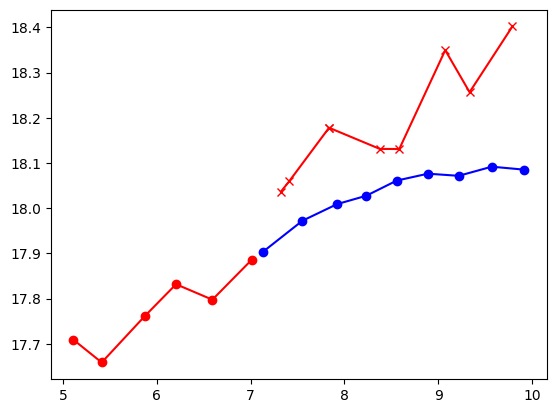

In [14]:
idx =8
best_mode = np.argmax(output_dict["mixture_logits"][idx].numpy())
plot_example(input_batch, pred, idx, mode=best_mode)
#plot_all(input_batch, pred, idx, mode=best_mode)

In [ ]:
# plot the relative positions to compare trajectories
def plot_example(input, pred, idx, mode):

    ground_truth = input[0][idx][:,:2].numpy()
    prediction = pred["position"][idx,:,mode,:2].numpy()

    plt.plot(ground_truth[:9,0], ground_truth[:9,1], 'ro-', label='Ground Truth Input')
    plt.plot(ground_truth[9:,0], ground_truth[9:,1], 'rx-', label='Ground Truth Forecast')
    plt.plot(prediction[9:,0], prediction[9:,1],'bo-', label='Model Forecast')
    plt.show()

# Accuracy Metrics

Mean ADE and Mean FDE

In [10]:
def calculate_meanADE(ground_truth, predictions, dim):
        predicted_positions = predictions[:, :, :dim]
        displacement_errors = np.linalg.norm(ground_truth - predicted_positions, axis=2)
        ADE = np.mean(np.mean(displacement_errors, axis=1))
        return ADE

def calculate_meanFDE(ground_truth, predictions, dim):
        predicted_positions = predictions[:, :, :dim]
        final_displacement_errors = np.linalg.norm(ground_truth[:, -1] - predicted_positions[:, -1], axis=1)
        FDE = np.mean(final_displacement_errors)
        return FDE

In [20]:
def get_best_pred(pred):
    best_pred = []
    for i in range(1000):
        best_mode = np.argmax(output_dict["mixture_logits"][i].numpy())
        best_pred.append( pred["position"][i,:,best_mode,:2].numpy())
    return np.asarray(best_pred)
best_pred = get_best_pred(pred)

In [19]:
with open('best_synth_pred.npy','wb') as f:
    np.save(f, best_pred)


In [21]:
meanADE = calculate_meanADE(input_batch[0].numpy()[:,9:,:2], best_pred[:,9:,:2], dim=2)
meanFDE = calculate_meanFDE(input_batch[0].numpy()[:,9:,:2], best_pred[:,9:,:2], dim=2)
print("mean ADE", meanADE)
print("mean FDE", meanFDE)

mean ADE 1.6404527730884184
mean FDE 1.6697480197823817
